In [ ]:
from google.colab import drive
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks")  

In [ ]:
#
# REFERENCE: https://www.worldometers.info/coronavirus/country/viet-nam/
#
#
import numpy as np
import glob2
import pandas as pd
import matplotlib.pyplot as plt

# #TOTAL DEADTHS:  

#Daily New Deaths in Vietnam
filepath = "Covid19-analysis/world.csv"
df = pd.read_csv(filepath)

#Edit for easier visualize
for i, e in enumerate(df["day"]):
    new_e = e.replace(" ", "")
    df["day"][i] = new_e

df = df[:df.loc[df['day'] == 'Apr01,2022'].index.tolist()[0]]
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,day,Active-cases,Daily-cases,Total-deaths,Daily-deaths
450,450,"Mar27,2022",2669453,97163,42306,0
451,451,"Mar28,2022",2616081,86412,42358,52
452,452,"Mar29,2022",2507390,91364,42413,55
453,453,"Mar30,2022",2481326,88662,42454,41
454,454,"Mar31,2022",2314274,83469,42493,39


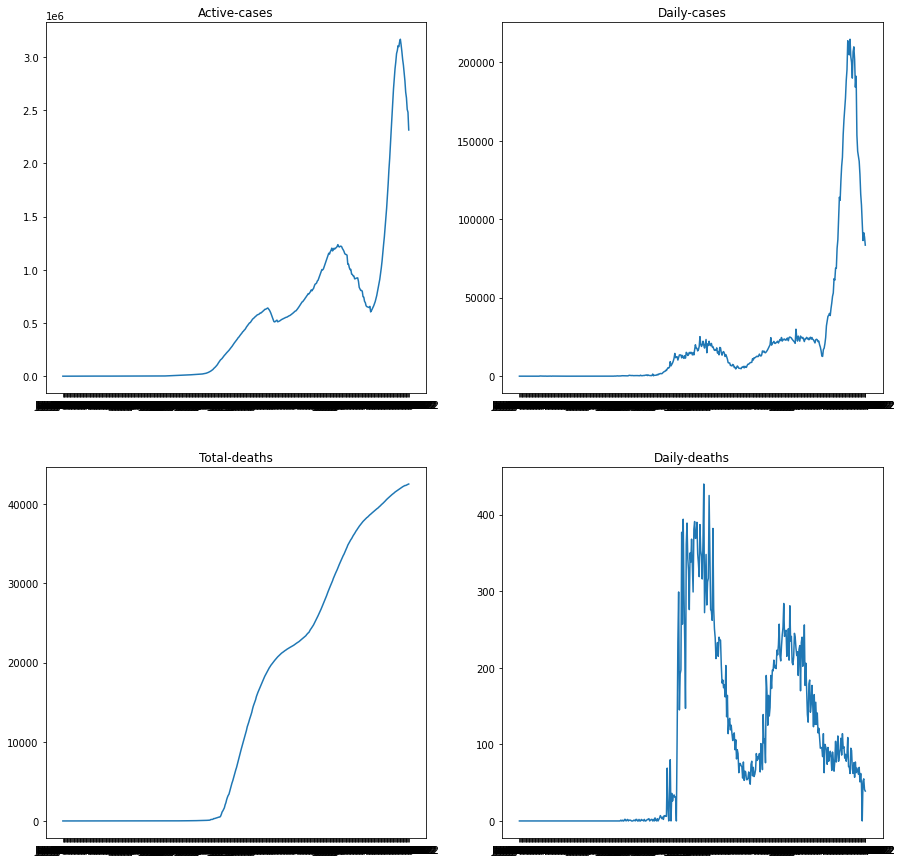

In [ ]:
fields = ['Active-cases', 'Daily-cases', 'Total-deaths', 'Daily-deaths']
pos_plot = [[0, 0], [0, 1], [1, 0], [1, 1]]

figure, axis = plt.subplots(2, 2, figsize=(15, 15))

def plot_line_chart(title, x_label, y_label, posX, posY):
    global axis, fields, df
    axis[posX, posY].plot(df['day'].tolist(), df[title].tolist())
    axis[posX, posY].set_title(title)

for i in range(len(fields)):
    plot_line_chart(fields[i], 'Day', 'Count', pos_plot[i][0], pos_plot[i][1])
    
# from scipy import stats

#['Active-cases', "Daily-cases", 'Total-deaths', "Daily-deaths"]
# key = "Daily-deaths"
# data = df[key]


#PLAIN DATA:
# new_data = np.array([])
# x = np.linspace(0,500, 1000)
# for i, e in enumerate(data):
#     data_count = np.empty(e)
#     data_count.fill(i)
#     new_data = np.concatenate((new_data, data_count))
# print(f">> new_data: {new_data.shape}, sum: {np.sum(data)}")

# Guassian test 1:
# statistic, p_value = stats.shapiro(new_data)
# print(f">> statistic: {stats}, p: {p_value}")

#Visualize histogram:
# mean, var  = stats.distributions.norm.fit(new_data)
# print(f"mean: {mean}, var: {var}")
# fitted_data = stats.distributions.norm.pdf(x, mean, var)

#Gamma
# fit_alpha, fit_loc, fit_beta = stats.distributions.gamma.fit(new_data)
# fitted_data = stats.distributions.gamma.pdf(x, fit_alpha, fit_loc, fit_beta)

#Beta: 
# fit_alpha, fit_beta, loc, scale = stats.distributions.beta.fit(new_data)
# fitted_data = stats.distributions.beta.pdf(x, fit_alpha, fit_beta, loc, scale)
#fitted_data = fitted_data / np.max(fitted_data) * np.max(data)

#dweibull
# param1, param2, param3 = stats.distributions.dweibull.fit(new_data)
# fitted_data = stats.distributions.dweibull.pdf(x, param1, param2, param3)


#Plot:
# plt.hist(new_data, density=True, bins=len(data), label="hist")
# plt.plot(x,fitted_data,'r-', label="line_over_plot")
# plt.savefig(f'{key}_hist.png') 

#Visualize QQ plot:
# from statsmodels.graphics.gofplots import qqplot
# qqplot(new_data, line='s')
# plt.savefig(f'{key}_qq.png') 

#Lin => Histogram by add points:
# from sklearn.mixture import GaussianMixture

# def _norm(x, mean, std):
#     return 1.0/(std * np.sqrt(2 * np.pi))*np.exp(-0.5 * ((x - mean) / std) ** 2) 

# data_id = np.arange(len(data))
# total = np.sum(data)
# mean = np.sum(data_id * data) / total

# std = np.sqrt(np.sum(np.power(data_id - mean, 2) * data)/total)

# print(np.max(data))

# norm_value = _norm(data_id, mean, std)
# norm_max = np.max(norm_value)
# count_mean = np.max(data)

# print(f"mean: {mean}, std: {std}")
# plt.bar(data_id, data, color ='maroon')
# plt.plot(data_id,_norm(data_id, mean, std) / norm_max * count_mean,color="blue",linewidth=3)
# plt.show()

In [ ]:
#!/usr/bin/env python3
from datetime import date
import base64
import requests

# Our world in data relatively percent of some variant
varient = [
    [100, 0, 0], # From 1/1/2021 --> 28/11/2021. Delta/ Omicron/ Other
    [99.14, 0, 0.86], #From 29/11/2021 --> 26/12/2021.
    [88.37, 11.63, 0], #From 27/12/2021 --> 9/1/2022.
    [69.17, 30.83, 0], #From 10/1/2022 --> 23/1/2022.
    [46.36, 53.64, 0], #From 24/1/2022 --> 20/2/2022.
    [45.23, 54.77, 0], #From 21/2/2022 --> 6/3/2022.
    [8.03, 91.97, 0], #From 7/3/2022 --> 20/3/2022.
    [2.19, 97.81, 0], #From 21/3/2022 --> 3/4/2022.
    [0.31, 99.69, 0], #From 4/4/2022 --> 17/4/2022.
    [0, 100, 0], #From 18/4/2022 --> Now.
]

mark_end = [date(2021, 11, 28) - date(2021, 1, 1), date(2021, 12, 26) - date(2021, 1, 1), date(2022, 1, 9) - date(2021, 1, 1),
            date(2022, 1, 23) - date(2021, 1, 1), date(2022, 2, 20) - date(2021, 1, 1), date(2022, 3, 6) - date(2021, 1, 1),
            date(2022, 3, 20) - date(2021, 1, 1), date(2022, 4, 3) - date(2021, 1, 1), date(2022, 4, 17) - date(2021, 1, 1)]
for i in range(9):
  mark_end[i] = mark_end[i].days

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Total samples of total cases = 237628605
Total samples of delta cases = 143691869
Total samples of omicron cases = 93679603
Total samples of other cases = 257133


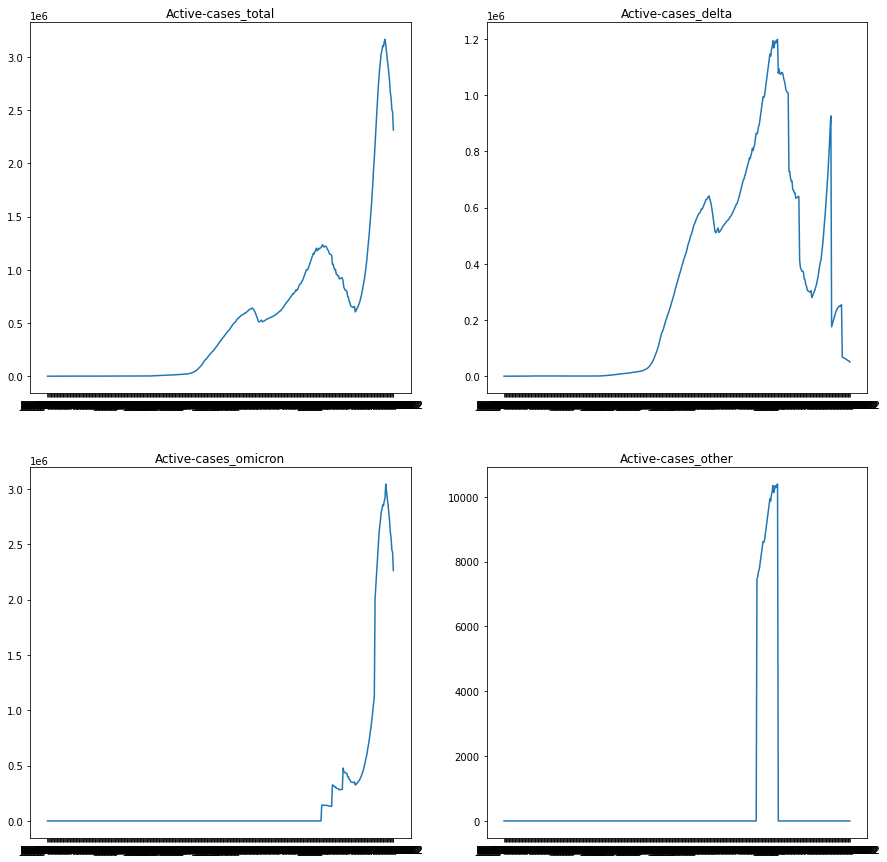

In [ ]:
!pip install distfit
from scipy import stats
import statsmodels
from distfit import distfit
figure, axis = plt.subplots(2, 2, figsize=(15, 15))

list_value = df['Active-cases'].tolist()
list_day = df['day'].tolist()
# Total value
axis[0, 0].plot(list_day, list_value)
axis[0, 0].set_title("Active-cases_total")
print(f"Total samples of total cases = {sum(list_value)}")
# axis[0, 0].axvline(x='Feb01,2022')

# Delta value
list_value_delta = list_value.copy()
for j in range(len(list_value_delta)):
  for k in range(8):
    if (j > mark_end[k] and j <= mark_end[k + 1]):
      list_value_delta[j] = round(list_value_delta[j] * varient[k + 1][0] / 100)
  if (j > mark_end[8]):
    list_value_delta[j] = 0
axis[0, 1].plot(list_day, list_value_delta)
axis[0, 1].set_title("Active-cases_delta")

print(f"Total samples of delta cases = {sum(list_value_delta)}")
# axis[0, 1].axvline(x='Apr17,2022')

# Omicron value
list_value_omicron = list_value.copy()
for j in range(len(list_value_omicron)):
  if (j <= mark_end[0]):
    list_value_omicron[j] = 0
  for k in range(8):
    if (j > mark_end[k] and j <= mark_end[k + 1]):
      list_value_omicron[j] = round(list_value_omicron[j] * varient[k + 1][1] / 100)
axis[1, 0].plot(list_day, list_value_omicron)
axis[1, 0].set_title("Active-cases_omicron")
# axis[1, 0].axvline(x='Feb01,2022')
print(f"Total samples of omicron cases = {sum(list_value_omicron)}")

# Other value
list_value_other = list_value.copy()
for j in range(len(list_value_other)):
  if (j <= mark_end[0]):
    list_value_other[j] = 0
  for k in range(8):
    if (j > mark_end[k] and j <= mark_end[k + 1]):
      list_value_other[j] = round(list_value_other[j] * varient[k + 1][2] / 100)
  if (j > mark_end[8]):
    list_value_other[j] = 0
axis[1, 1].plot(list_day, list_value_other)
axis[1, 1].set_title("Active-cases_other")
print(f"Total samples of other cases = {sum(list_value_other)}")
# axis[1, 0].axvline(x='Feb01,2022')

In [ ]:
# Active-cases
list_value = df['Active-cases'].tolist()
list_value = list(np.log(np.asarray(list_value) + 1))
list_value = [round(lv) for lv in list_value]
list_day = df['day'].tolist()
#PLAIN DATA:
new_data = np.array([])
for i, e in enumerate(list_value):
    data_count = np.empty(e)
    data_count.fill(i)
    new_data = np.concatenate((new_data, data_count))
print(f">> new_data: {new_data.shape}, sum: {sum(list_value)}")

# Fit distribution
dist = distfit(distr = ['norm', 'genextreme', 'expon', 'gamma', 'pareto', 'dweibull', 'beta', 't', 'uniform', 'loggamma'])
dist.fit_transform(new_data)
dist.summary

>> new_data: (4974,), sum: 4974
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.87171e-05] [loc=262.241 scale=123.548]
[distfit] >[genextreme] [0.14 sec] [RSS: 1.56778e-05] [loc=239.895 scale=139.418]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000119131] [loc=0.000 scale=262.241]
[distfit] >[gamma     ] [0.16 sec] [RSS: 3.02078e-05] [loc=-1986.388 scale=6.954]
[distfit] >[pareto    ] [0.39 sec] [RSS: 0.000125986] [loc=-4599251.914 scale=4599251.911]
[distfit] >[dweibull  ] [0.11 sec] [RSS: 3.2538e-05] [loc=262.505 scale=114.369]
[distfit] >[beta      ] [0.33 sec] [RSS: 3.09786e-06] [loc=-2.569 scale=456.569]
[distfit] >[t         ] [0.11 sec] [RSS: 2.87174e-05] [loc=262.242 scale=123.546]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.97279e-05] [loc=0.000 scale=454.000]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 2.33342e-05] [loc=237.202 scale=141.338]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.000003,NaN,-2.568646,456.568646,"(1.28433914441896, 0.922082406061763)"
1,genextreme,0.000016,NaN,239.894782,139.417673,"(0.6244407813907207,)"
2,uniform,0.00002,NaN,0.0,454.0,()
3,loggamma,0.000023,NaN,237.201912,141.337799,"(1.6610215120108316,)"
4,norm,0.000029,NaN,262.241456,123.547613,()
5,t,0.000029,NaN,262.242265,123.54625,"(51310.13865109424,)"
6,gamma,0.00003,NaN,-1986.387643,6.954272,"(323.26644983824576,)"
7,dweibull,0.000033,NaN,262.504583,114.369332,"(1.4756045866615186,)"
8,expon,0.000119,NaN,0.0,262.241456,()
9,pareto,0.000126,NaN,-4599251.914485,4599251.911243,"(18335.41693942825,)"


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78ab7dee10>)

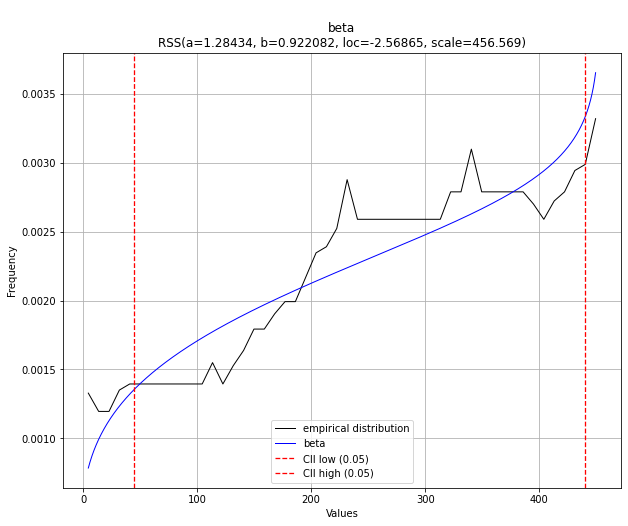

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78acf3f090>)

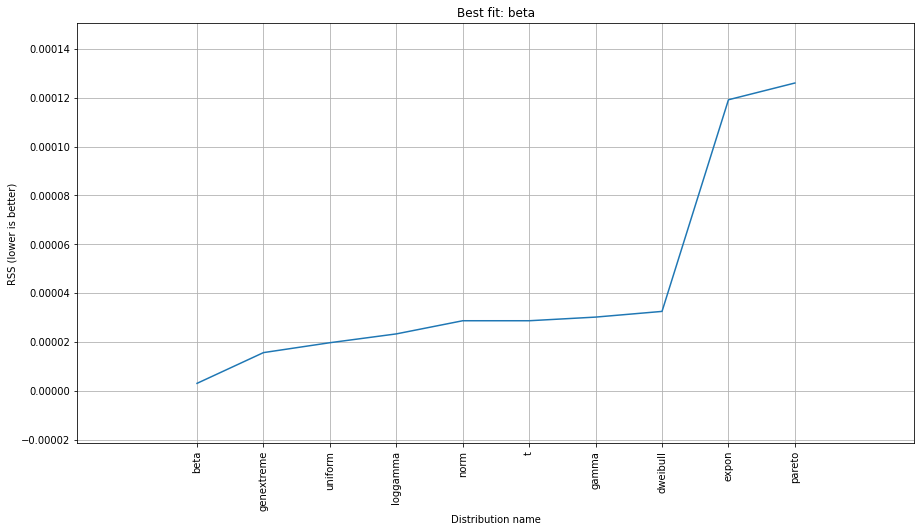

In [ ]:
dist.plot_summary()

>> beta: Statistic = 0.02093751607964489 and p-value = 0.02553117671182987
>> genextreme: Statistic = 0.043009781545219894 and p-value = 2.0372616687174192e-08
>> uniform: Statistic = 0.1319947427061247 and p-value = 1.0691714084528813e-75
>> loggamma: Statistic = 0.04430622244087845 and p-value = 6.606656475954646e-09
>> norm: Statistic = 0.062199761215434135 and p-value = 3.858077275581411e-17
>> t: Statistic = 0.06219836235392151 and p-value = 3.864761810700661e-17
>> gamma: Statistic = 0.066688795778582 and p-value = 1.2208821711622232e-19
>> dweibull: Statistic = 0.05885683448011436 and p-value = 2.1614699603956978e-15
>> expon: Statistic = 0.23037833904762825 and p-value = 1.0032048907945915e-229
>> pareto: Statistic = 0.24555722399790986 and p-value = 6.171044372508567e-261


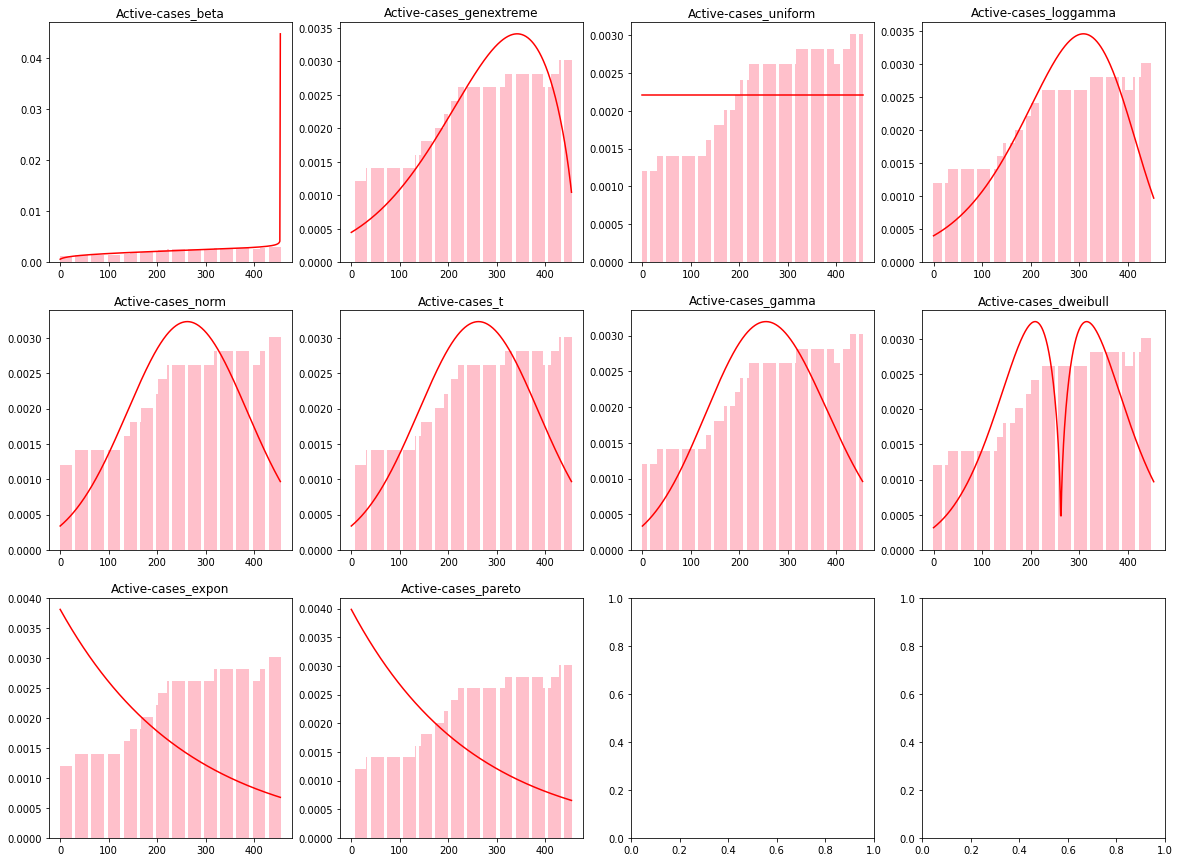

In [ ]:
import scipy

figure, axis = plt.subplots(3, 4, figsize=(20, 15))
list_distribution = dist.summary
distr_list = list_distribution['distr']
loc_list = list_distribution['loc']
scale_list = list_distribution['scale']
arg_list = list_distribution['arg'].tolist()
parameter_arg = [list(arg_list[i]) + list([loc_list[i], scale_list[i]]) for i in range(len(distr_list))]
pos_plot = [[0, 0], [0, 1], [0, 2], [0, 3],
            [1, 0], [1, 1], [1, 2], [1, 3],
            [2, 0], [2, 1], [2, 2], [2, 3]]
x = [i for i in range(len(list_value))]
num_sample = sum(list_value)
list_value_prop = list(np.asarray(list_value) * 1.0 / num_sample)

for i in range(len(distr_list)):
  statistic, p_value = scipy.stats.kstest(new_data, distr_list[i], args=tuple(parameter_arg[i]))
  print(f">> {distr_list[i]}: Statistic = {statistic} and p-value = {p_value}")
  list_parameter = ""
  for j in range(len(parameter_arg[i])):
    list_parameter += str(parameter_arg[i][j])
    if (j + 1 != len(parameter_arg[i])):
      list_parameter += ", "
  # print(list_parameter)
  fitted_data = eval("stats.distributions." + distr_list[i] + ".pdf(x, " + list_parameter + ")")
  # axis[pos_plot[i][0], pos_plot[i][1]].hist(new_data, density=True, bins=len(list_value), label="hist")
  axis[pos_plot[i][0], pos_plot[i][1]].bar(x, list_value_prop, color="pink")
  axis[pos_plot[i][0], pos_plot[i][1]].plot(x,fitted_data,'r-', label="line_over_plot")
  axis[pos_plot[i][0], pos_plot[i][1]].set_title("Active-cases_" + distr_list[i])

In [ ]:
list_value = df['Daily-cases'].tolist()
list_value = list(np.log(np.asarray(list_value) + 1))
list_value = [round(lv) for lv in list_value]
list_day = df['day'].tolist()
#PLAIN DATA:
new_data = np.array([])
x = np.linspace(0, 500, 1000)
for i, e in enumerate(list_value):
    data_count = np.empty(e)
    data_count.fill(i)
    new_data = np.concatenate((new_data, data_count))
print(f">> new_data: {new_data.shape}, sum: {sum(list_value)}")

# Fit distribution
dist = distfit()
dist.fit_transform(new_data)
dist.summary

>> new_data: (3304,), sum: 3304
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.17298e-05] [loc=286.228 scale=110.457]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.00017927] [loc=0.000 scale=286.228]
[distfit] >[pareto    ] [0.46 sec] [RSS: 0.000367603] [loc=-3208947096.921 scale=3208947096.921]
[distfit] >[dweibull  ] [0.12 sec] [RSS: 2.80484e-05] [loc=290.510 scale=101.187]
[distfit] >[t         ] [0.11 sec] [RSS: 3.17317e-05] [loc=286.233 scale=110.450]
[distfit] >[genextreme] [0.11 sec] [RSS: 2.13746e-05] [loc=267.931 scale=125.503]
[distfit] >[gamma     ] [0.12 sec] [RSS: 3.23327e-05] [loc=-1550.808 scale=6.846]
[distfit] >[lognorm   ] [0.30 sec] [RSS: 3.4331e-05] [loc=-4414.049 scale=4698.045]
[distfit] >[beta      ] [0.10 sec] [RSS: 7.61374e-06] [loc=-10.139 scale=464.174]
[distfit] >[uniform   ] [0.00 sec] [RSS: 5.84584e-05] [loc=0.000 scale=454.000]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 3.05718e-05] [loc=299.414 scale=110.258]
[distfit] >Com

,distr,score,LLE,loc,scale,arg
0,beta,0.000008,NaN,-10.138511,464.173825,"(1.839153048863036, 1.0350601528208336)"
1,genextreme,0.000021,NaN,267.930949,125.502663,"(0.653579011667629,)"
2,dweibull,0.000028,NaN,290.509933,101.186863,"(1.4584701640327031,)"
3,loggamma,0.000031,NaN,299.414263,110.257524,"(1.3447521689264161,)"
4,norm,0.000032,NaN,286.227906,110.456777,()
5,t,0.000032,NaN,286.232812,110.450076,"(1774941.2833319851,)"
6,gamma,0.000032,NaN,-1550.807775,6.84594,"(268.44725387458266,)"
7,lognorm,0.000034,NaN,-4414.048655,4698.044848,"(0.0231951126195995,)"
8,uniform,0.000058,NaN,0.0,454.0,()
9,expon,0.000179,NaN,0.0,286.227906,()


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78ab3fd650>)

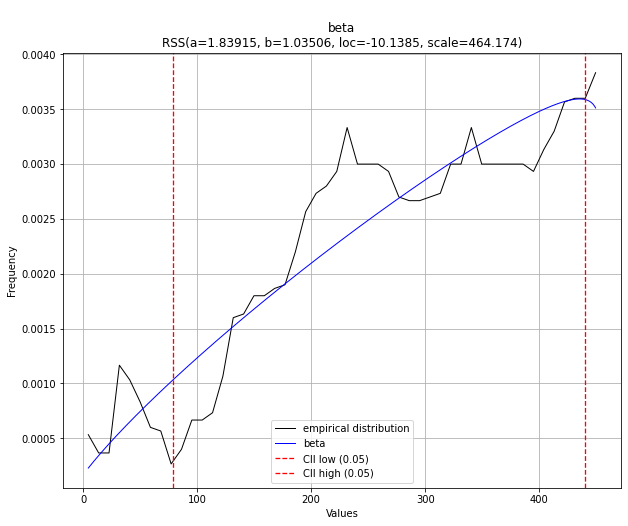

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78acf7c850>)

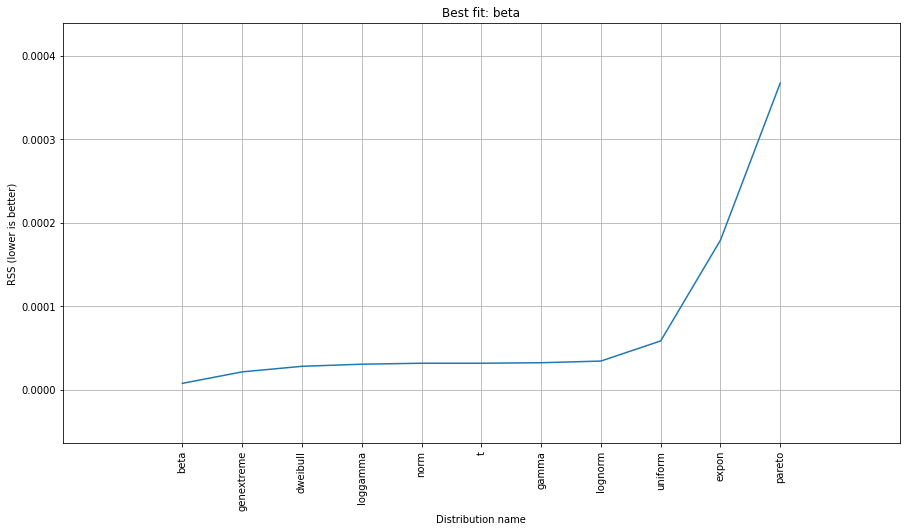

In [ ]:
dist.plot_summary()

>> beta: Statistic = 0.028126700410045363 and p-value = 0.010732097242511493
>> genextreme: Statistic = 0.05966826055123259 and p-value = 1.212309243347253e-10
>> dweibull: Statistic = 0.06677705315659399 and p-value = 3.1916120188404224e-13
>> loggamma: Statistic = 0.05213404394101917 and p-value = 3.169449481798822e-08
>> norm: Statistic = 0.06439463686369717 and p-value = 2.516773810776377e-12
>> t: Statistic = 0.06438871811963409 and p-value = 2.529482410874132e-12
>> gamma: Statistic = 0.07125683031028585 and p-value = 5.363230902544693e-15
>> lognorm: Statistic = 0.06795266087893026 and p-value = 1.1206284914958822e-13
>> uniform: Statistic = 0.2209976426918113 and p-value = 1.3779780421648497e-140
>> expon: Statistic = 0.2906556426926946 and p-value = 7.191083134751488e-243
>> pareto: Statistic = 0.5163021230820728 and p-value = 0.0


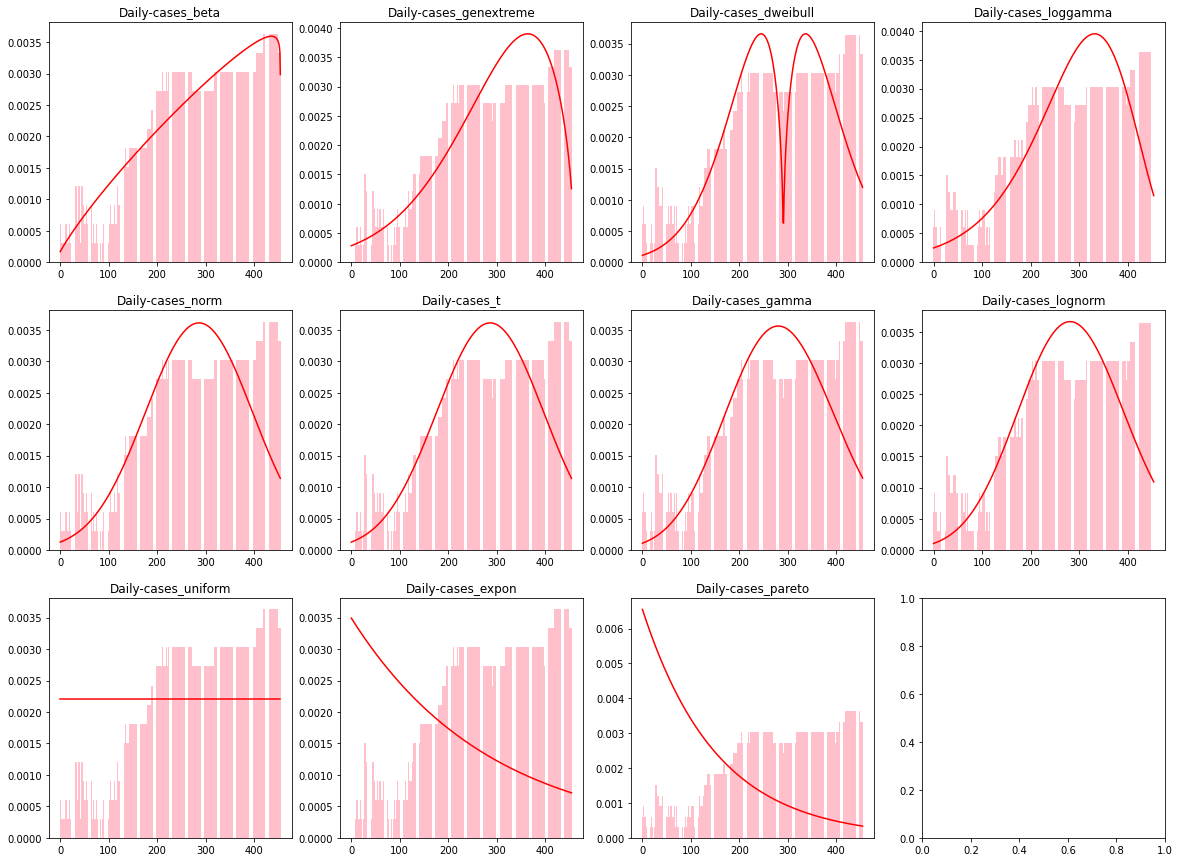

In [ ]:
import scipy

figure, axis = plt.subplots(3, 4, figsize=(20, 15))
list_distribution = dist.summary
distr_list = list_distribution['distr']
loc_list = list_distribution['loc']
scale_list = list_distribution['scale']
arg_list = list_distribution['arg'].tolist()
parameter_arg = [list(arg_list[i]) + list([loc_list[i], scale_list[i]]) for i in range(11)]
pos_plot = [[0, 0], [0, 1], [0, 2], [0, 3],
            [1, 0], [1, 1], [1, 2], [1, 3],
            [2, 0], [2, 1], [2, 2], [2, 3]]
x = [i for i in range(len(list_value))]
num_sample = sum(list_value)
list_value_prop = list(np.asarray(list_value) * 1.0 / num_sample)

for i in range(11):
  statistic, p_value = scipy.stats.kstest(new_data, distr_list[i], args=tuple(parameter_arg[i]))
  print(f">> {distr_list[i]}: Statistic = {statistic} and p-value = {p_value}")
  list_parameter = ""
  for j in range(len(parameter_arg[i])):
    list_parameter += str(parameter_arg[i][j])
    if (j + 1 != len(parameter_arg[i])):
      list_parameter += ", "
  # print(list_parameter)
  fitted_data = eval("stats.distributions." + distr_list[i] + ".pdf(x, " + list_parameter + ")")
  # axis[pos_plot[i][0], pos_plot[i][1]].hist(new_data, density=True, bins=len(list_value), label="hist")
  axis[pos_plot[i][0], pos_plot[i][1]].bar(x, list_value_prop, color="pink")
  axis[pos_plot[i][0], pos_plot[i][1]].plot(x,fitted_data,'r-', label="line_over_plot")
  axis[pos_plot[i][0], pos_plot[i][1]].set_title("Daily-cases_" + distr_list[i])

In [ ]:
list_value = df['Total-deaths'].tolist()
list_value = list(np.log(np.asarray(list_value) + 1))
list_value = [round(lv) for lv in list_value]
list_day = df['day'].tolist()
#PLAIN DATA:
new_data = np.array([])
for i, e in enumerate(list_value):
    data_count = np.empty(e)
    data_count.fill(i)
    new_data = np.concatenate((new_data, data_count))
print(f">> new_data: {new_data.shape}, sum: {sum(list_value)}")

# Fit distribution
dist = distfit(distr = ['norm', 'genextreme', 'expon', 'gamma', 'pareto', 'dweibull', 'beta', 't', 'uniform', 'loggamma'])
dist.fit_transform(new_data)
dist.summary

>> new_data: (3349,), sum: 3349
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 3.65054e-05] [loc=276.864 scale=121.336]
[distfit] >[genextreme] [0.25 sec] [RSS: 1.36541e-05] [loc=259.460 scale=138.051]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000150831] [loc=0.000 scale=276.864]
[distfit] >[gamma     ] [0.16 sec] [RSS: 4.03438e-05] [loc=-1531.404 scale=8.573]
[distfit] >[pareto    ] [0.28 sec] [RSS: 0.000154488] [loc=-13588233569.351 scale=13588233569.351]
[distfit] >[dweibull  ] [0.09 sec] [RSS: 3.89296e-05] [loc=281.508 scale=108.295]
[distfit] >[beta      ] [0.16 sec] [RSS: 6.51764e-06] [loc=-45.701 scale=499.701]
[distfit] >[t         ] [0.09 sec] [RSS: 3.65047e-05] [loc=276.866 scale=121.334]
[distfit] >[uniform   ] [0.00 sec] [RSS: 4.10802e-05] [loc=0.000 scale=454.000]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 2.31685e-05] [loc=396.724 scale=60.492]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.000007,NaN,-45.701006,499.701006,"(1.8123240581575597, 0.991192695562237)"
1,genextreme,0.000014,NaN,259.460404,138.051474,"(0.6975098116014358,)"
2,loggamma,0.000023,NaN,396.724208,60.492177,"(0.4963931138885539,)"
3,t,0.000037,NaN,276.866211,121.334067,"(35159.91522053382,)"
4,norm,0.000037,NaN,276.86384,121.336437,()
5,dweibull,0.000039,NaN,281.507766,108.294803,"(1.356489351866561,)"
6,gamma,0.00004,NaN,-1531.40357,8.573251,"(210.75776121401606,)"
7,uniform,0.000041,NaN,0.0,454.0,()
8,expon,0.000151,NaN,0.0,276.86384,()
9,pareto,0.000154,NaN,-13588233569.351116,13588233569.351116,"(50271718.73356749,)"


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78ac52b350>)

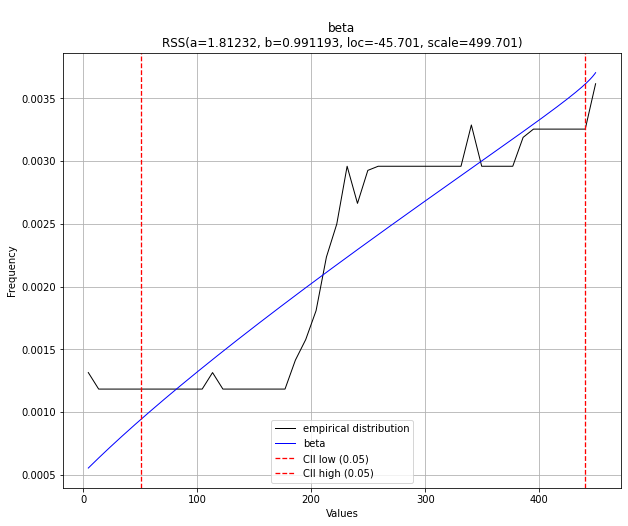

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78a8b40b10>)

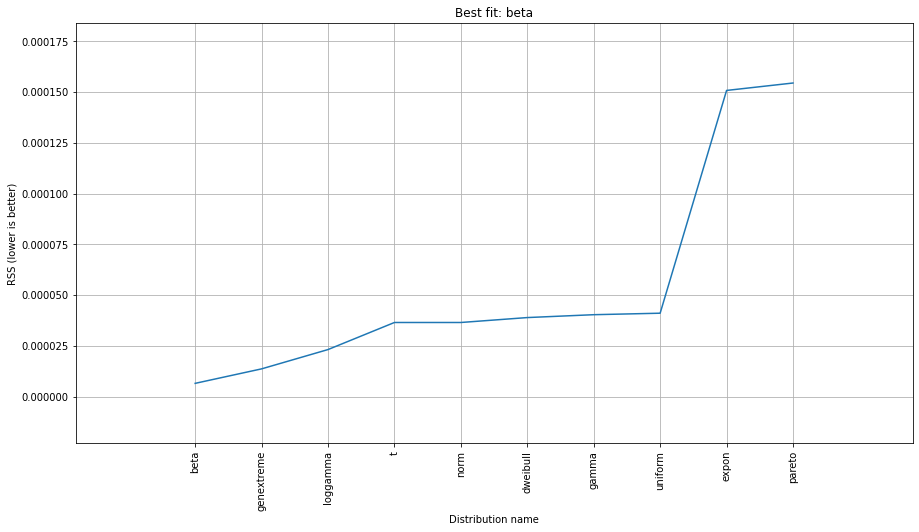

In [ ]:
dist.plot_summary()

>> beta: Statistic = 0.031267746601460866 and p-value = 0.0028646768488607066
>> genextreme: Statistic = 0.03603870426584355 and p-value = 0.0003334104589337108
>> loggamma: Statistic = 0.04639459946874874 and p-value = 1.0958039503903485e-06
>> t: Statistic = 0.07216530260213894 and p-value = 1.4188862169125362e-15
>> norm: Statistic = 0.07216206893761667 and p-value = 1.4233285933433744e-15
>> dweibull: Statistic = 0.07627105809866597 and p-value = 2.3940595384343718e-17
>> gamma: Statistic = 0.07890782837678134 and p-value = 1.5448822671833994e-18
>> uniform: Statistic = 0.19982886600379096 and p-value = 1.3928110000367144e-116
>> expon: Statistic = 0.2699370163111403 and p-value = 2.19189680202626e-212
>> pareto: Statistic = 0.2783515507770562 and p-value = 8.323745841993057e-226


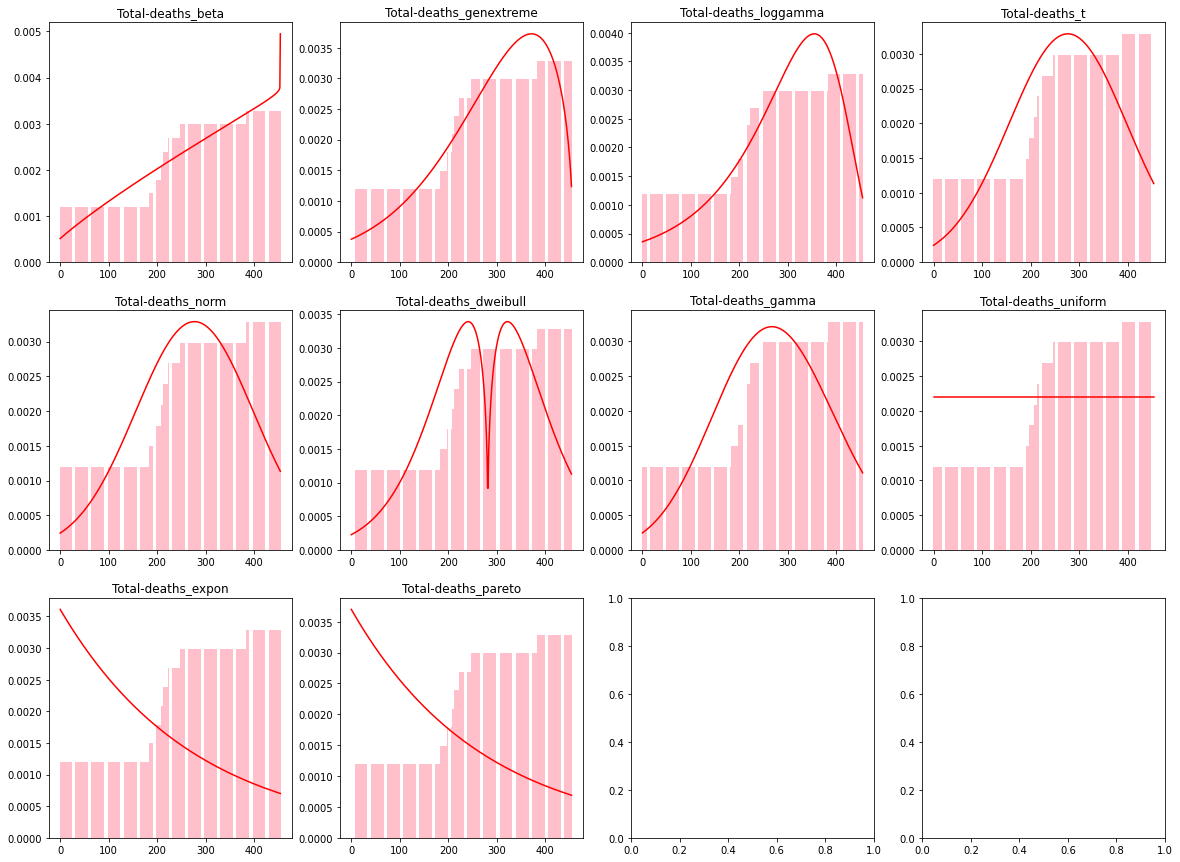

In [ ]:
import scipy

figure, axis = plt.subplots(3, 4, figsize=(20, 15))
list_distribution = dist.summary
distr_list = list_distribution['distr']
loc_list = list_distribution['loc']
scale_list = list_distribution['scale']
arg_list = list_distribution['arg'].tolist()
parameter_arg = [list(arg_list[i]) + list([loc_list[i], scale_list[i]]) for i in range(len(distr_list))]
pos_plot = [[0, 0], [0, 1], [0, 2], [0, 3],
            [1, 0], [1, 1], [1, 2], [1, 3],
            [2, 0], [2, 1], [2, 2], [2, 3]]
x = [i for i in range(len(list_value))]
num_sample = sum(list_value)
list_value_prop = list(np.asarray(list_value) * 1.0 / num_sample)

for i in range(len(distr_list)):
  statistic, p_value = scipy.stats.kstest(new_data, distr_list[i], args=tuple(parameter_arg[i]))
  print(f">> {distr_list[i]}: Statistic = {statistic} and p-value = {p_value}")
  list_parameter = ""
  for j in range(len(parameter_arg[i])):
    list_parameter += str(parameter_arg[i][j])
    if (j + 1 != len(parameter_arg[i])):
      list_parameter += ", "
  # print(list_parameter)
  fitted_data = eval("stats.distributions." + distr_list[i] + ".pdf(x, " + list_parameter + ")")
  # axis[pos_plot[i][0], pos_plot[i][1]].hist(new_data, density=True, bins=len(list_value), label="hist")
  axis[pos_plot[i][0], pos_plot[i][1]].bar(x, list_value_prop ,color="pink")
  axis[pos_plot[i][0], pos_plot[i][1]].plot(x,fitted_data,'r-', label="line_over_plot")
  axis[pos_plot[i][0], pos_plot[i][1]].set_title("Total-deaths_" + distr_list[i])

In [ ]:
list_value = df['Daily-deaths'].tolist()
list_value = list(np.log(np.asarray(list_value) + 1))
list_value = [round(lv) for lv in list_value]
list_day = df['day'].tolist()
# print(len(list_day))
# print((date(2022, 3, 31) - date(2021, 1, 1)).days)
#PLAIN DATA:
new_data = np.array([])
x = np.linspace(0, 500, 1000)
for i, e in enumerate(list_value):
    data_count = np.empty(e)
    data_count.fill(i)
    new_data = np.concatenate((new_data, data_count))
print(f">> new_data: {new_data.shape}, sum: {sum(list_value)}")

# Fit distribution
dist = distfit(distr = ['norm', 'genextreme', 'expon', 'gamma', 'pareto', 'dweibull', 'beta', 't', 'uniform', 'loggamma'])
dist.fit_transform(new_data)
dist.summary

>> new_data: (1298,), sum: 1298
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 7.06761e-05] [loc=315.365 scale=77.703]
[distfit] >[genextreme] [0.12 sec] [RSS: 6.47154e-05] [loc=293.368 scale=81.316]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000302241] [loc=133.000 scale=182.365]
[distfit] >[gamma     ] [0.17 sec] [RSS: 7.05317e-05] [loc=-7024.353 scale=0.823]
[distfit] >[pareto    ] [0.14 sec] [RSS: 0.000526204] [loc=-0.304 scale=133.304]
[distfit] >[dweibull  ] [0.11 sec] [RSS: 5.08321e-05] [loc=312.496 scale=74.713]
[distfit] >[beta      ] [0.15 sec] [RSS: 3.38178e-05] [loc=131.487 scale=323.685]
[distfit] >[t         ] [0.17 sec] [RSS: 7.06751e-05] [loc=315.349 scale=77.704]
[distfit] >[uniform   ] [0.00 sec] [RSS: 9.00602e-05] [loc=133.000 scale=321.000]
[distfit] >[loggamma  ] [0.23 sec] [RSS: 7.08933e-05] [loc=-8230.977 scale=1457.850]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.000034,NaN,131.487047,323.68543,"(1.8255535896585753, 1.349851111950929)"
1,dweibull,0.000051,NaN,312.496104,74.71288,"(1.6681157877240615,)"
2,genextreme,0.000065,NaN,293.368102,81.31608,"(0.42477404200842145,)"
3,gamma,0.000071,NaN,-7024.352646,0.82301,"(8918.124202257935,)"
4,t,0.000071,NaN,315.348971,77.703873,"(2527696.987927692,)"
5,norm,0.000071,NaN,315.365177,77.702828,()
6,loggamma,0.000071,NaN,-8230.977456,1457.85024,"(352.0292227281768,)"
7,uniform,0.00009,NaN,133.0,321.0,()
8,expon,0.000302,NaN,133.0,182.365177,()
9,pareto,0.000526,NaN,-0.30444,133.30444,"(1.2054621929541405,)"


[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78b1c75e10>)

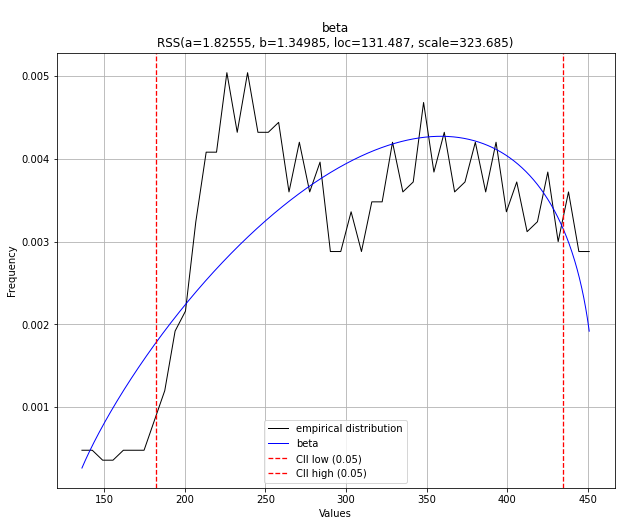

In [ ]:
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f78ac06d590>)

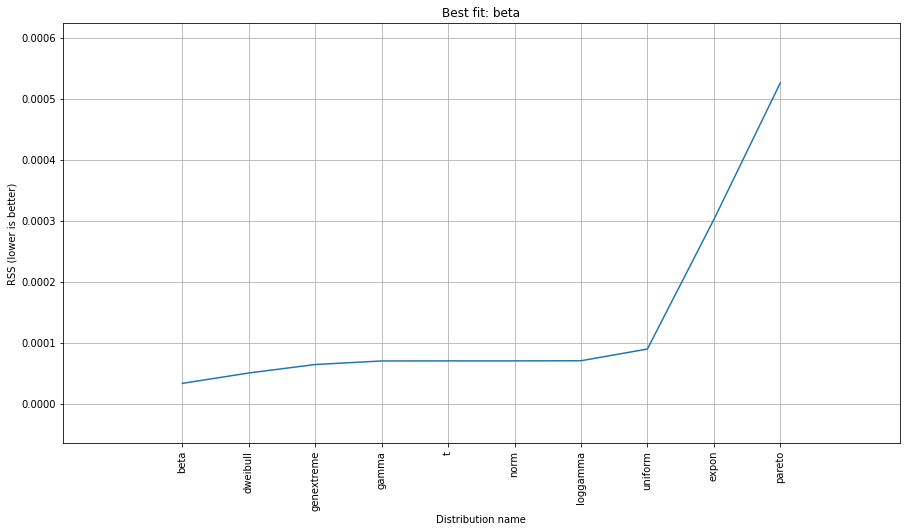

In [ ]:
dist.plot_summary()

>> beta: Statistic = 0.05313927307268895 and p-value = 0.0012605633678406457
>> dweibull: Statistic = 0.04464916148583642 and p-value = 0.010962303527825823
>> genextreme: Statistic = 0.07418441177519003 and p-value = 1.1704782702341335e-06
>> gamma: Statistic = 0.06670904038677308 and p-value = 1.821431462706103e-05
>> t: Statistic = 0.06717838605113174 and p-value = 1.5463219572821843e-05
>> norm: Statistic = 0.06724363395758665 and p-value = 1.5113822899165505e-05
>> loggamma: Statistic = 0.06833533021385976 and p-value = 1.0277124971418154e-05
>> uniform: Statistic = 0.16658506496935135 and p-value = 5.958992448941093e-32
>> expon: Statistic = 0.2695981806772469 and p-value = 8.186591469365377e-84
>> pareto: Statistic = 0.3487882508100774 and p-value = 1.244210733703098e-141


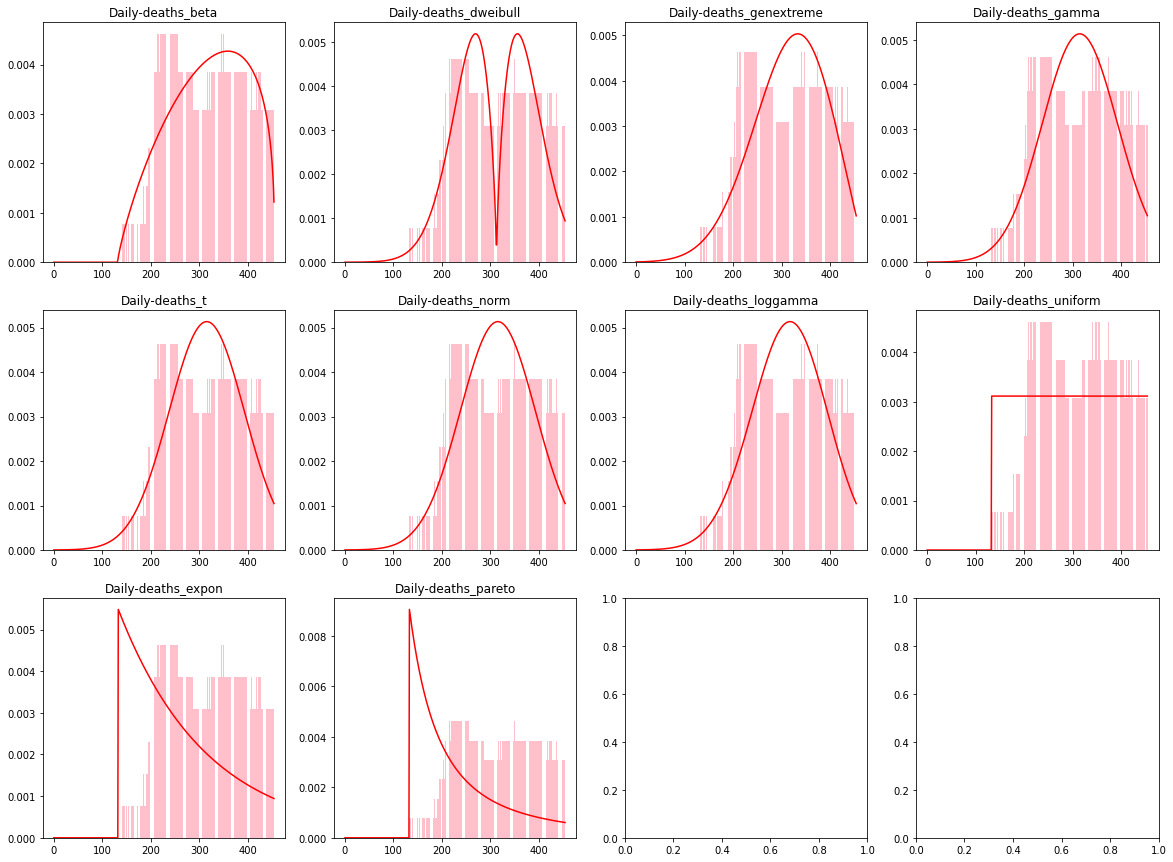

In [ ]:
import scipy

figure, axis = plt.subplots(3, 4, figsize=(20, 15))
list_distribution = dist.summary
distr_list = list_distribution['distr']
loc_list = list_distribution['loc']
scale_list = list_distribution['scale']
arg_list = list_distribution['arg'].tolist()
parameter_arg = [list(arg_list[i]) + list([loc_list[i], scale_list[i]]) for i in range(len(distr_list))]
pos_plot = [[0, 0], [0, 1], [0, 2], [0, 3],
            [1, 0], [1, 1], [1, 2], [1, 3],
            [2, 0], [2, 1], [2, 2], [2, 3]]
x = [i for i in range(len(list_value))]
num_sample = sum(list_value)
list_value_prop = list(np.asarray(list_value) * 1.0 / num_sample)

for i in range(len(distr_list)):
  statistic, p_value = scipy.stats.kstest(new_data, distr_list[i], args=tuple(parameter_arg[i]))
  print(f">> {distr_list[i]}: Statistic = {statistic} and p-value = {p_value}")
  list_parameter = ""
  for j in range(len(parameter_arg[i])):
    list_parameter += str(parameter_arg[i][j])
    if (j + 1 != len(parameter_arg[i])):
      list_parameter += ", "
  # print(list_parameter)
  fitted_data = eval("stats.distributions." + distr_list[i] + ".pdf(x, " + list_parameter + ")")
  # axis[pos_plot[i][0], pos_plot[i][1]].hist(new_data, density=True, bins=len(list_value), label="hist")
  axis[pos_plot[i][0], pos_plot[i][1]].bar(x, list_value_prop ,color="pink")
  axis[pos_plot[i][0], pos_plot[i][1]].plot(x,fitted_data,'r-', label="line_over_plot")
  axis[pos_plot[i][0], pos_plot[i][1]].set_title("Daily-deaths_" + distr_list[i])